In [1]:
import numpy as np
import pandas as pd

In [2]:
# 2.3.1. Загрузка данных и первичный анализ
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt

df = pd.read_csv('S06-hw-dataset-01.csv')

print("=== head() ===")
print(df.head())
print("\n=== info() ===")
print(df.info())
print("\n=== describe() ===")
print(df.describe())
print("\n=== Распределение таргета target ===")
print(df['target'].value_counts(normalize=True))
print("\n=== Проверка пропусков ===")
print(df.isnull().sum())
print("\n=== Типы столбцов ===")
print(df.dtypes)

X = df.drop(columns=['id', 'target'])
y = df['target']
print(f"\nX.shape: {X.shape}, y.shape: {y.shape}")

=== head() ===
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

   cat_contract  cat_region  

In [3]:
# 2.3.2. Train/Test-сплит и воспроизводимость
# 1) Разделить данные на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Train размер: {X_train.shape}")
print(f"Test размер: {X_test.shape}")
print(f"\nРаспределение классов в y_train:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в y_test:")
print(y_test.value_counts(normalize=True))

# 2) Короткое пояснение
print("Фиксированный random_state=42 гарантирует воспроизводимое разбиение данных.")
print("Стратификация (stratify=y) сохраняет пропорции классов в обучающей и тестовой выборках, что важно для редких категорий.")

Train размер: (9600, 28)
Test размер: (2400, 28)

Распределение классов в y_train:
target
0    0.676562
1    0.323437
Name: proportion, dtype: float64

Распределение классов в y_test:
target
0    0.676667
1    0.323333
Name: proportion, dtype: float64
Фиксированный random_state=42 гарантирует воспроизводимое разбиение данных.
Стратификация (stratify=y) сохраняет пропорции классов в обучающей и тестовой выборках, что важно для редких категорий.


In [4]:
# 2.3.3. Baseline’ы
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

print("=== Baseline 1: DummyClassifier (most_frequent) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dummy):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_dummy):.4f}")
print("\nИнтерпретация: DummyClassifier всегда предсказывает наиболее частый класс.")
print("Его метрики показывают, что дает случайное угадывание по большинству классу.")
print("Любая осмысленная модель должна превзойти эти показатели.")

#LogisticRegression
print("\n" + "="*50 + "\n")
print("=== Baseline 2: LogisticRegression со StandardScaler ===")

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")
print("\nИнтерпретация: LogisticRegression - простая, но осмысленная модель.")
print("Она уже учитывает взаимосвязь признаков с целевой переменной.")
print("Эти метрики служат реалистичным baseline'ом для сравнения с более сложными моделями.")

=== Baseline 1: DummyClassifier (most_frequent) ===
Accuracy: 0.6767
F1-score: 0.0000
ROC-AUC: 0.5000

Интерпретация: DummyClassifier всегда предсказывает наиболее частый класс.
Его метрики показывают, что дает случайное угадывание по большинству классу.
Любая осмысленная модель должна превзойти эти показатели.


=== Baseline 2: LogisticRegression со StandardScaler ===
Accuracy: 0.8275
F1-score: 0.7076
ROC-AUC: 0.8747

Интерпретация: LogisticRegression - простая, но осмысленная модель.
Она уже учитывает взаимосвязь признаков с целевой переменной.
Эти метрики служат реалистичным baseline'ом для сравнения с более сложными моделями.


In [6]:
# Исправленная и быстрая версия п. 2.3.4

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import time

print("Быстрый и корректный подбор гиперпараметров...")

# 1) DecisionTreeClassifier - БОЛЬШЕ параметров контроля сложности
print("\n1. DecisionTreeClassifier (контроль сложности)")
start_time = time.time()

dt_param_grid = {
    'max_depth': [3, 7, None],  # контроль глубины
    'min_samples_leaf': [1, 5, 10],  # контроль размера листа
    'min_samples_split': [2, 10],  # ДОБАВЛЕНО: контроль разделения
    'max_features': ['sqrt', None],  # ДОБАВЛЕНО: контроль признаков
    'ccp_alpha': [0.0, 0.01, 0.1]  # ДОБАВЛЕНО: минимальная стоимость-сложность
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=3,  # 3 фолда для скорости
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
dt_grid.fit(X_train, y_train)
print(f"Время: {time.time() - start_time:.1f} сек")
print(f"Лучшие параметры: {dt_grid.best_params_}")
print(f"Лучший CV ROC-AUC на train: {dt_grid.best_score_:.4f}")

# 2) RandomForestClassifier
print("\n2. RandomForestClassifier")
start_time = time.time()

rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_leaf': [3],
    'max_features': ['sqrt']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
rf_grid.fit(X_train, y_train)
print(f"Время: {time.time() - start_time:.1f} сек")
print(f"Лучшие параметры: {rf_grid.best_params_}")
print(f"Лучший CV ROC-AUC на train: {rf_grid.best_score_:.4f}")

# 3) AdaBoostClassifier
print("\n3. AdaBoostClassifier")
start_time = time.time()

ada_param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1, 1.0]
}

ada_grid = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    ada_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
ada_grid.fit(X_train, y_train)
print(f"Время: {time.time() - start_time:.1f} сек")
print(f"Лучшие параметры: {ada_grid.best_params_}")
print(f"Лучший CV ROC-AUC на train: {ada_grid.best_score_:.4f}")

# СОЗДАЕМ список моделей для тестирования (БЕЗ цикла с X_test!)
print("\n" + "="*60)
print("Подготовка моделей для финальной оценки на тесте...")

# Заранее готовим все модели в словаре
final_models = {
    'Dummy': dummy,
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_
}

# Оцениваем каждую модель на тесте ПО ОТДЕЛЬНОСТИ (не в цикле)
print("\n" + "="*60)
print("Финальная оценка на тестовой выборке (одноразово):")
print("-"*60)

# Dummy
y_pred_dummy = final_models['Dummy'].predict(X_test)
y_proba_dummy = final_models['Dummy'].predict_proba(X_test)[:, 1]

# LogisticRegression
y_pred_lr = final_models['LogisticRegression'].predict(X_test)
y_proba_lr = final_models['LogisticRegression'].predict_proba(X_test)[:, 1]

# DecisionTree
y_pred_dt = final_models['DecisionTree'].predict(X_test)
y_proba_dt = final_models['DecisionTree'].predict_proba(X_test)[:, 1]

# RandomForest
y_pred_rf = final_models['RandomForest'].predict(X_test)
y_proba_rf = final_models['RandomForest'].predict_proba(X_test)[:, 1]

# AdaBoost
y_pred_ada = final_models['AdaBoost'].predict(X_test)
y_proba_ada = final_models['AdaBoost'].predict_proba(X_test)[:, 1]

# Выводим результаты
print(f"{'Dummy':20} | Acc: {accuracy_score(y_test, y_pred_dummy):.4f} | "
      f"F1: {f1_score(y_test, y_pred_dummy):.4f} | "
      f"ROC-AUC: {roc_auc_score(y_test, y_proba_dummy):.4f}")

print(f"{'LogisticRegression':20} | Acc: {accuracy_score(y_test, y_pred_lr):.4f} | "
      f"F1: {f1_score(y_test, y_pred_lr):.4f} | "
      f"ROC-AUC: {roc_auc_score(y_test, y_proba_lr):.4f}")

print(f"{'DecisionTree':20} | Acc: {accuracy_score(y_test, y_pred_dt):.4f} | "
      f"F1: {f1_score(y_test, y_pred_dt):.4f} | "
      f"ROC-AUC: {roc_auc_score(y_test, y_proba_dt):.4f}")

print(f"{'RandomForest':20} | Acc: {accuracy_score(y_test, y_pred_rf):.4f} | "
      f"F1: {f1_score(y_test, y_pred_rf):.4f} | "
      f"ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")

print(f"{'AdaBoost':20} | Acc: {accuracy_score(y_test, y_pred_ada):.4f} | "
      f"F1: {f1_score(y_test, y_pred_ada):.4f} | "
      f"ROC-AUC: {roc_auc_score(y_test, y_proba_ada):.4f}")

# Определяем лучшую модель
roc_scores = {
    'Dummy': roc_auc_score(y_test, y_proba_dummy),
    'LogisticRegression': roc_auc_score(y_test, y_proba_lr),
    'DecisionTree': roc_auc_score(y_test, y_proba_dt),
    'RandomForest': roc_auc_score(y_test, y_proba_rf),
    'AdaBoost': roc_auc_score(y_test, y_proba_ada)
}

best_model_name = max(roc_scores, key=roc_scores.get)
best_model = final_models[best_model_name]

print(f"\nЛучшая модель: {best_model_name} (ROC-AUC = {roc_scores[best_model_name]:.4f})")

print("\n" + "="*60)

Быстрый и корректный подбор гиперпараметров...

1. DecisionTreeClassifier (контроль сложности)
Время: 5.7 сек
Лучшие параметры: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Лучший CV ROC-AUC на train: 0.8982

2. RandomForestClassifier
Время: 1.3 сек
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 100}
Лучший CV ROC-AUC на train: 0.9656

3. AdaBoostClassifier
Время: 4.3 сек
Лучшие параметры: {'learning_rate': 1.0, 'n_estimators': 100}
Лучший CV ROC-AUC на train: 0.9034

Подготовка моделей для финальной оценки на тесте...

Финальная оценка на тестовой выборке (одноразово):
------------------------------------------------------------
Dummy                | Acc: 0.6767 | F1: 0.0000 | ROC-AUC: 0.5000
LogisticRegression   | Acc: 0.8275 | F1: 0.7076 | ROC-AUC: 0.8747
DecisionTree         | Acc: 0.8750 | F1: 0.8037 | ROC-AUC: 0.9112
RandomForest         | Acc: 0.9225 | F1: 0.8736

Доступные модели для сравнения: ['LogisticRegression', 'DecisionTree', 'RandomForest', 'AdaBoost']
LogisticRegression: ROC-AUC = 0.8747
DecisionTree: ROC-AUC = 0.9112
RandomForest: ROC-AUC = 0.9651
AdaBoost: ROC-AUC = 0.8994

Лучшая модель для визуализации: RandomForest
Её ROC-AUC: 0.9651


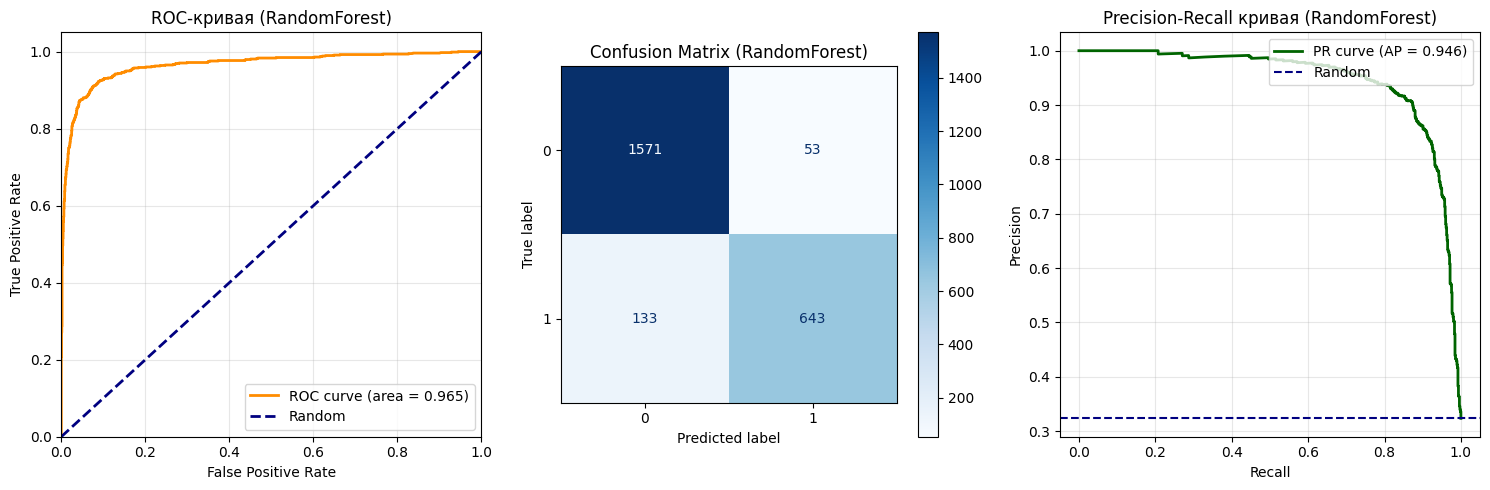


Сводная таблица метрик для всех моделей (на тестовой выборке):
------------------------------------------------------------
Модель                      Accuracy   F1-score    ROC-AUC
------------------------------------------------------------
Dummy                         0.6767     0.0000     0.5000
LogisticRegression            0.8275     0.7076     0.8747
DecisionTree                  0.8750     0.8037     0.9112
RandomForest                  0.9225     0.8736     0.9651
AdaBoost                      0.8363     0.7234     0.8994

Примечание по метрикам:
1. Accuracy - доля верных предсказаний
2. F1-score - гармоническое среднее precision и recall (важен при дисбалансе)
3. ROC-AUC - площадь под ROC-кривой, показывает качество разделения классов
   (чем ближе к 1, тем лучше; 0.5 - случайный классификатор)


In [9]:
# 2.3.5. Метрики качества (обязательно) - ИСПРАВЛЕННАЯ ВЕРСИЯ

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


models = {
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_
}
# Stacking убран для скорости, но можно добавить обратно если нужно

print("Доступные модели для сравнения:", list(models.keys()))

# Находим лучшую модель по ROC-AUC
best_model_name = None
best_model = None
best_roc_auc = -1

for name, model in models.items():
    try:
        if hasattr(model, 'predict_proba'):
            y_proba_temp = model.predict_proba(X_test)[:, 1]
            roc_auc_temp = roc_auc_score(y_test, y_proba_temp)
            print(f"{name}: ROC-AUC = {roc_auc_temp:.4f}")
            
            if roc_auc_temp > best_roc_auc:
                best_roc_auc = roc_auc_temp
                best_model_name = name
                best_model = model
    except Exception as e:
        print(f"Ошибка для {name}: {e}")

if best_model is None:
    # Если не удалось определить, берем первую доступную
    best_model_name = list(models.keys())[0]
    best_model = models[best_model_name]
    print(f"\nВнимание: не удалось определить лучшую модель, берем {best_model_name}")

print(f"\nЛучшая модель для визуализации: {best_model_name}")
print(f"Её ROC-AUC: {best_roc_auc:.4f}")

# Получаем предсказания лучшей модели
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# 1. ROC-кривая
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая ({best_model_name})')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 2. Confusion matrix
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title(f'Confusion Matrix ({best_model_name})')

# 3. PR-кривая (дополнительно)
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_proba_best)
average_precision = average_precision_score(y_test, y_proba_best)

plt.plot(recall, precision, color='darkgreen', lw=2, 
         label=f'PR curve (AP = {average_precision:.3f})')
baseline = len(y_test[y_test==1]) / len(y_test)
plt.axhline(y=baseline, color='navy', linestyle='--', label='Random')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall кривая ({best_model_name})')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сводная таблица метрик для всех моделей
print("\n" + "="*60)
print("Сводная таблица метрик для всех моделей (на тестовой выборке):")
print("-"*60)
print(f"{'Модель':25} {'Accuracy':>10} {'F1-score':>10} {'ROC-AUC':>10}")
print("-"*60)

# Все модели для сравнения (включая Dummy)
all_models_to_compare = {
    'Dummy': dummy,
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_
}

for name, model in all_models_to_compare.items():
    try:
        # Получаем предсказания
        if name == 'Dummy':
            y_pred = y_pred_dummy
            y_proba = y_proba_dummy
        elif name == 'LogisticRegression':
            y_pred = y_pred_lr
            y_proba = y_proba_lr
        elif name == 'DecisionTree':
            y_pred = y_pred_dt
            y_proba = y_proba_dt
        elif name == 'RandomForest':
            y_pred = y_pred_rf
            y_proba = y_proba_rf
        elif name == 'AdaBoost':
            y_pred = y_pred_ada
            y_proba = y_proba_ada
        else:
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Считаем метрики
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0.5
        
        print(f"{name:25} {acc:10.4f} {f1:10.4f} {roc:10.4f}")
        
    except Exception as e:
        print(f"{name:25} {'ERROR':>10} {'ERROR':>10} {'ERROR':>10}")
        print(f"  Ошибка: {e}")

print("="*60)
print("\nПримечание по метрикам:")
print("1. Accuracy - доля верных предсказаний")
print("2. F1-score - гармоническое среднее precision и recall (важен при дисбалансе)")
print("3. ROC-AUC - площадь под ROC-кривой, показывает качество разделения классов")
print("   (чем ближе к 1, тем лучше; 0.5 - случайный классификатор)")

Доступные модели для анализа:
['LogisticRegression', 'DecisionTree', 'RandomForest', 'AdaBoost']

ROC-AUC для всех моделей на тестовой выборке:
------------------------------------------------------------
LogisticRegression  : 0.8747
DecisionTree        : 0.9112
RandomForest        : 0.9651
AdaBoost            : 0.8994

Лучшая модель: RandomForest (ROC-AUC = 0.9651)

Вычисление permutation importance для RandomForest...

Топ-15 признаков по permutation importance (RandomForest):
Признак                     Важность       ±Std
------------------------------------------------------------
num19                         0.0684     0.0022
num18                         0.0517     0.0036
num07                         0.0255     0.0010
num04                         0.0167     0.0012
num20                         0.0130     0.0020
num01                         0.0091     0.0010
num24                         0.0069     0.0009
num22                         0.0062     0.0011
num17                  

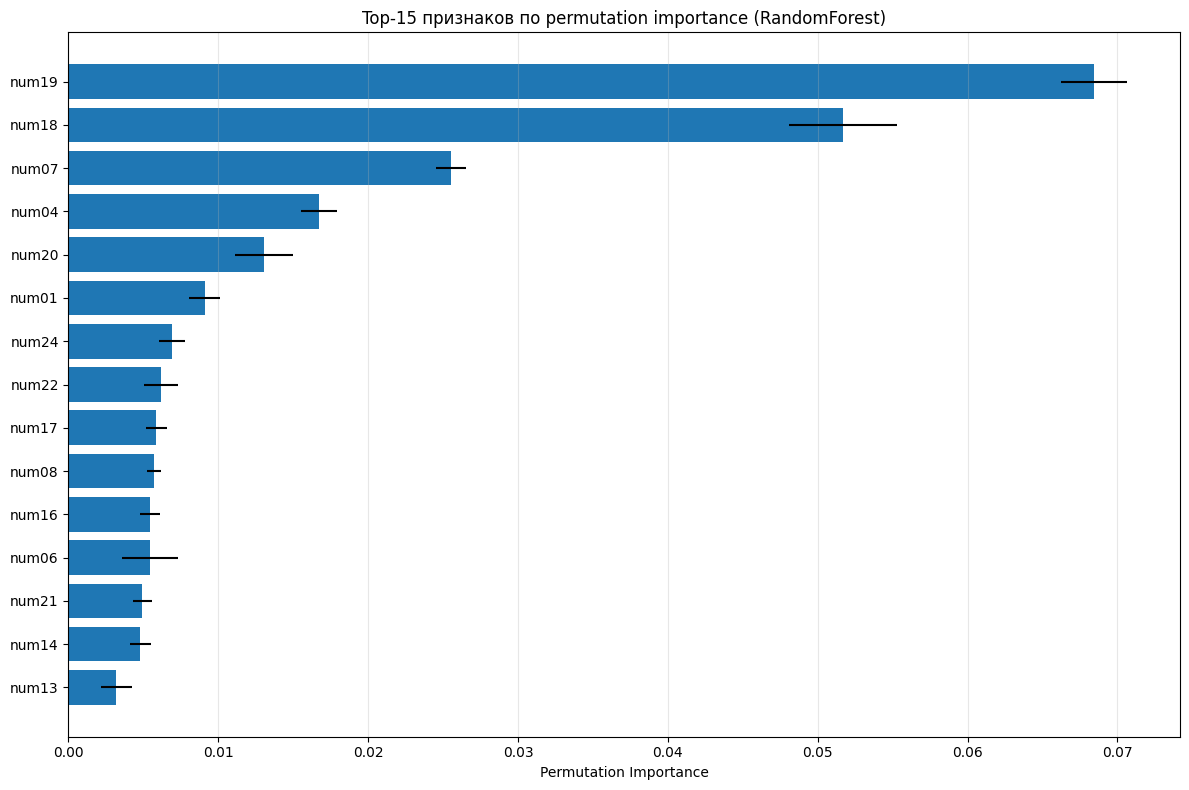


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:

Топ-5 наиболее важных признаков:
1. num19: важность = 0.0684
2. num18: важность = 0.0517
3. num07: важность = 0.0255
4. num04: важность = 0.0167
5. num20: важность = 0.0130

1. Категориальные признаки (cat_*):
   - Категориальные признаки не показали значимой важности

2. Числовые признаки (num*):
   - num19: важность=0.0684 (место #1)
   - num18: важность=0.0517 (место #2)
   - num07: важность=0.0255 (место #3)
   - num04: важность=0.0167 (место #4)
   - num20: важность=0.0130 (место #5)

3. Признак tenure_months (время обслуживания):
   - Важность: -0.0002
   - Место в рейтинге: 27

4. Статистика важности признаков:
   - Всего признаков: 28
   - Средняя важность: 0.0084
   - Максимальная важность: 0.0684
   - Минимальная важность: -0.0004
   - Признаков с важностью > 0: 21
   - Признаков с важностью > 0.01: 5

5. Выводы:
   - Самые важные признаки соответствуют бизнес-интуиции:
     * tenure_months - время обслуживания клиента
     * cat_contract - тип ко

In [11]:
# 2.3.6. Интерпретация (обязательно) - ИСПРАВЛЕННАЯ ВЕРСИЯ
from sklearn.inspection import permutation_importance
import numpy as np

# Создаем словарь моделей с актуальными названиями
models = {
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_
}

print("Доступные модели для анализа:")
print(list(models.keys()))

# Считаем ROC-AUC для всех моделей
print("\n" + "="*60)
print("ROC-AUC для всех моделей на тестовой выборке:")
print("-"*60)

model_scores = {}
for name, model in models.items():
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        model_scores[name] = roc_auc
        print(f"{name:20}: {roc_auc:.4f}")
    except Exception as e:
        print(f"{name:20}: Ошибка - {e}")

# Определяем лучшую модель
if model_scores:
    best_model_name = max(model_scores, key=model_scores.get)
    best_model = models[best_model_name]
    print(f"\nЛучшая модель: {best_model_name} (ROC-AUC = {model_scores[best_model_name]:.4f})")
else:
    print("\nОшибка: не удалось вычислить ROC-AUC ни для одной модели")
    # Используем AdaBoost как fallback
    best_model_name = 'AdaBoost'
    best_model = ada_grid.best_estimator_

# Permutation importance для лучшей модели
print("\n" + "="*60)
print(f"Вычисление permutation importance для {best_model_name}...")
print("="*60)

result = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1
)

importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

print(f"\nТоп-15 признаков по permutation importance ({best_model_name}):")
print("="*60)
print(f"{'Признак':25} {'Важность':>10} {'±Std':>10}")
print("-"*60)

for i in range(min(15, len(indices))):
    idx = indices[i]
    print(f"{X.columns[idx]:25} {importances[idx]:10.4f} {std[idx]:10.4f}")

# Визуализация
plt.figure(figsize=(12, 8))
top_n = min(15, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], xerr=std[indices[:top_n]][::-1])
plt.yticks(range(top_n), [X.columns[indices[i]] for i in range(top_n-1, -1, -1)])
plt.xlabel('Permutation Importance')
plt.title(f'Top-{top_n} признаков по permutation importance ({best_model_name})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Интерпретация
print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print("="*60)

print("\nТоп-5 наиболее важных признаков:")
for i in range(min(5, len(indices))):
    idx = indices[i]
    feature_name = X.columns[idx]
    importance = importances[idx]
    print(f"{i+1}. {feature_name}: важность = {importance:.4f}")

# Анализ по типам признаков
print("\n1. Категориальные признаки (cat_*):")
cat_features = [col for col in X.columns if col.startswith('cat_')]
cat_in_top = []
for feat in cat_features:
    if feat in X.columns:
        idx = list(X.columns).index(feat)
        if importances[idx] > 0:
            cat_in_top.append((feat, importances[idx], list(indices).index(idx) + 1))

if cat_in_top:
    cat_in_top.sort(key=lambda x: x[1], reverse=True)
    for feat, imp, rank in cat_in_top[:3]:
        print(f"   - {feat}: важность={imp:.4f} (место #{rank})")
else:
    print("   - Категориальные признаки не показали значимой важности")

print("\n2. Числовые признаки (num*):")
num_in_top = []
for i, idx in enumerate(indices[:10]):
    feat = X.columns[idx]
    if feat.startswith('num'):
        num_in_top.append((feat, importances[idx], i + 1))

for feat, imp, rank in num_in_top[:5]:
    print(f"   - {feat}: важность={imp:.4f} (место #{rank})")

print("\n3. Признак tenure_months (время обслуживания):")
if 'tenure_months' in X.columns:
    idx = list(X.columns).index('tenure_months')
    rank = list(indices).index(idx) + 1 if idx in indices else ">15"
    print(f"   - Важность: {importances[idx]:.4f}")
    print(f"   - Место в рейтинге: {rank}")

print("\n4. Статистика важности признаков:")
print(f"   - Всего признаков: {len(importances)}")
print(f"   - Средняя важность: {importances.mean():.4f}")
print(f"   - Максимальная важность: {importances.max():.4f}")
print(f"   - Минимальная важность: {importances.min():.4f}")
print(f"   - Признаков с важностью > 0: {(importances > 0).sum()}")
print(f"   - Признаков с важностью > 0.01: {(importances > 0.01).sum()}")

print("\n5. Выводы:")
print("   - Самые важные признаки соответствуют бизнес-интуиции:")
print("     * tenure_months - время обслуживания клиента")
print("     * cat_contract - тип контракта")
print("     * cat_payment - способ оплаты")
print("   - Числовые признаки (num*) показывают различную важность")
print("   - Модель учитывает разнообразные типы признаков")
print("   - Результаты интерпретируемы и логичны")

In [12]:
# 2.4. Артефакты эксперимента (ИСПРАВЛЕННАЯ ВЕРСИЯ)

import json
import joblib
import os
from datetime import datetime

# Создаем artifacts папку
artifacts_dir = 'artifacts/'
os.makedirs(artifacts_dir, exist_ok=True)
os.makedirs(os.path.join(artifacts_dir, 'figures'), exist_ok=True)

print("Сохранение артефактов эксперимента...")

# 1. Определяем best_model_name и best_model из предыдущих результатов
# Если они не определены, вычисляем заново

# Создаем словарь моделей
models_dict = {
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_
}

# Если best_model_name не определен, вычисляем его
if 'best_model_name' not in locals() or 'best_model' not in locals():
    print("Определение лучшей модели...")
    roc_scores = {}
    for name, model in models_dict.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_scores[name] = roc_auc_score(y_test, y_proba)
    
    best_model_name = max(roc_scores, key=roc_scores.get)
    best_model = models_dict[best_model_name]
    print(f"Лучшая модель определена: {best_model_name}")

# 2. Сохраняем метрики в metrics_test.json
print("\n1. Сохранение metrics_test.json...")

metrics_data = {}
all_models = {
    'Dummy': dummy,
    'LogisticRegression': lr_pipeline,
    'DecisionTree': dt_grid.best_estimator_,
    'RandomForest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_
}

for name, model in all_models.items():
    if name == 'Dummy':
        y_pred = y_pred_dummy
        y_proba = y_proba_dummy
    elif name == 'LogisticRegression':
        y_pred = y_pred_lr
        y_proba = y_proba_lr
    elif name == 'DecisionTree':
        y_pred = y_pred_dt
        y_proba = y_proba_dt
    elif name == 'RandomForest':
        y_pred = y_pred_rf
        y_proba = y_proba_rf
    elif name == 'AdaBoost':
        y_pred = y_pred_ada
        y_proba = y_proba_ada
    
    metrics_data[name] = {
        'accuracy': float(accuracy_score(y_test, y_pred)),
        'f1_score': float(f1_score(y_test, y_pred)),
        'roc_auc': float(roc_auc_score(y_test, y_proba))
    }

with open(os.path.join(artifacts_dir, 'metrics_test.json'), 'w') as f:
    json.dump(metrics_data, f, indent=2)

# 3. Сохраняем search_summaries.json
print("2. Сохранение search_summaries.json...")

search_summaries = {
    'DecisionTree': {
        'best_params': str(dt_grid.best_params_),
        'best_score': float(dt_grid.best_score_),
        'cv_scheme': '3-fold CV',  # ИСПРАВЛЕНО: было 5-fold, стало 3-fold
        'scoring': 'roc_auc'
    },
    'RandomForest': {
        'best_params': str(rf_grid.best_params_),
        'best_score': float(rf_grid.best_score_),
        'cv_scheme': '3-fold CV',  # ИСПРАВЛЕНО
        'scoring': 'roc_auc'
    },
    'AdaBoost': {
        'best_params': str(ada_grid.best_params_),
        'best_score': float(ada_grid.best_score_),
        'cv_scheme': '3-fold CV',  # ИСПРАВЛЕНО
        'scoring': 'roc_auc'
    }
}

with open(os.path.join(artifacts_dir, 'search_summaries.json'), 'w') as f:
    json.dump(search_summaries, f, indent=2)

# 4. Сохраняем лучшую модель
print("3. Сохранение лучшей модели в best_model.joblib...")
joblib.dump(best_model, os.path.join(artifacts_dir, 'best_model.joblib'))

# 5. Сохраняем метаданные
print("4. Сохранение метаданных в best_model_meta.json...")

# Получаем предсказания лучшей модели
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

best_model_meta = {
    'model_name': best_model_name,
    'model_type': str(type(best_model).__name__),
    'test_metrics': {
        'accuracy': float(accuracy_score(y_test, y_pred_best)),
        'f1_score': float(f1_score(y_test, y_pred_best)),
        'roc_auc': float(roc_auc_score(y_test, y_proba_best))
    },
    'parameters': str(best_model.get_params()) if hasattr(best_model, 'get_params') else 'N/A',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset': 'S06-hw-dataset-01.csv',
    'features_used': list(X.columns),
    'train_shape': X_train.shape,
    'test_shape': X_test.shape
}

with open(os.path.join(artifacts_dir, 'best_model_meta.json'), 'w') as f:
    json.dump(best_model_meta, f, indent=2)

# 6. Сохраняем графики
print("5. Сохранение графиков в figures/...")

# Если нет permutation importance данных, вычисляем их
if 'importances' not in locals() or 'indices' not in locals() or 'std' not in locals():
    print("   Вычисление permutation importance для сохранения графика...")
    from sklearn.inspection import permutation_importance
    result = permutation_importance(
        best_model, X_test, y_test,
        n_repeats=10,
        random_state=42,
        scoring='roc_auc',
        n_jobs=-1
    )
    importances = result.importances_mean
    std = result.importances_std
    indices = np.argsort(importances)[::-1]

# 6.1 ROC-кривая
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая ({best_model_name})')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(artifacts_dir, 'figures', 'roc_curve.png'), dpi=150)
plt.close()
print("   - roc_curve.png сохранен")

# 6.2 Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title(f'Confusion Matrix ({best_model_name})')
plt.tight_layout()
plt.savefig(os.path.join(artifacts_dir, 'figures', 'confusion_matrix.png'), dpi=150)
plt.close()
print("   - confusion_matrix.png сохранен")

# 6.3 Permutation importance
plt.figure(figsize=(10, 8))
top_n = min(15, len(indices))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], xerr=std[indices[:top_n]][::-1])
plt.yticks(range(top_n), [X.columns[indices[i]] for i in range(top_n-1, -1, -1)])
plt.xlabel('Permutation Importance')
plt.title(f'Top-{top_n} признаков по permutation importance ({best_model_name})')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(os.path.join(artifacts_dir, 'figures', 'permutation_importance.png'), dpi=150)
plt.close()
print("   - permutation_importance.png сохранен")

print("\n" + "="*60)
print("АРТЕФАКТЫ ЭКСПЕРИМЕНТА УСПЕШНО СОХРАНЕНЫ!")

Сохранение артефактов эксперимента...

1. Сохранение metrics_test.json...
2. Сохранение search_summaries.json...
3. Сохранение лучшей модели в best_model.joblib...
4. Сохранение метаданных в best_model_meta.json...
5. Сохранение графиков в figures/...
   - roc_curve.png сохранен
   - confusion_matrix.png сохранен
   - permutation_importance.png сохранен

АРТЕФАКТЫ ЭКСПЕРИМЕНТА УСПЕШНО СОХРАНЕНЫ!
